# 8) Missing Value Treatment

# We cannot use KNN Imputer since the there are still categorical values in the data
imputer = KNNImputer(n_neighbors=5)
train = pd.DataFrame(imputer.fit_transform(train),columns = train.columns)

In [1]:
import numpy as np 
import pandas as pd 
import math
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler

In [2]:
train = pd.read_csv(r"C:\Users\syada11\Stores_sales_prediction\Train.csv")
test  = pd.read_csv(r"C:\Users\syada11\Stores_sales_prediction\Test.csv")

In [3]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# We have observed that we have missing value in 'Item_Weight' & 'Outlet_Size'
1. OutLet_Size is a catogerial column, we can use the mode to fill the missing values.
2. Item_weight is a numeric column and after visualizations, we can see clearly that there are no outliers in this feature. So we can replace missing values with its mean.

In [4]:
#filling the object values with mode and float type with mean
train_Outlet_Size_mode=train['Outlet_Size'].mode()[0]
# for train data
train['Outlet_Size'] = train.Outlet_Size.fillna(train_Outlet_Size_mode) 
train['Item_Weight'] = train.Item_Weight.fillna(train.Item_Weight.mean())

In [5]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

We have replaced the missing values

In [6]:
# for Test data
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In Test data also we have missing value in 'Item_weight' & 'Outlet_Size'

In [7]:
# for test
test['Outlet_Size'] = test.Outlet_Size.fillna(test.Outlet_Size.dropna().mode()[0]) #replace by the median after
test['Item_Weight'] = test.Item_Weight.fillna(test.Item_Weight.mean())

In [8]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

We have replaced missing values

# 9) Feature Engineering

In [9]:
# function to detect outliers using the IQR method
def detect_outliers(df, feature):
    Q1  = df[feature].quantile(0.25)
    Q3  = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

Text(0.5, 1.0, 'Item Visibility before removing outlier')

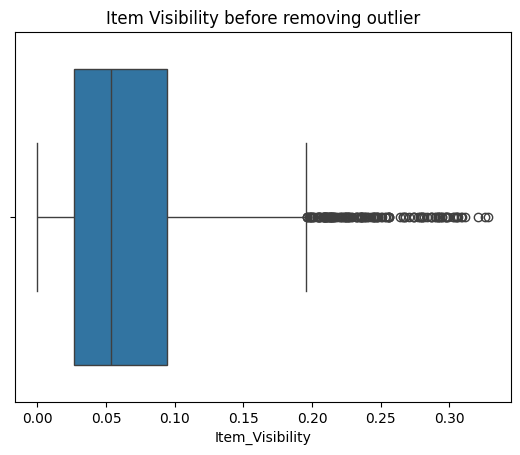

In [10]:
sns.boxplot(x=train['Item_Visibility'])
plt.title('Item Visibility before removing outlier')

In [11]:
train_upper, train_lower=detect_outliers(train,'Item_Visibility')

In [12]:
print("Upper Limit for train data",train_upper)
print('Lower Limit for train data',train_lower)

Upper Limit for train data 0.195979015
Lower Limit for train data -0.07440424500000001


In [13]:
# Removing Outlier using above function
train = train[(train['Item_Visibility'] > train_lower) & (train['Item_Visibility'] < train_upper)] #for train data

In [14]:
test_upper, test_lower=detect_outliers(test,'Item_Visibility')     # for test data

In [15]:
print("Upper limit for test data",test_upper)
print("Lower limit for test data", test_lower)

Upper limit for test data 0.193086245
Lower limit for test data -0.072576747


In [16]:
test = test[(test['Item_Visibility']>test_lower) & (test['Item_Visibility']<test_upper)]

Text(0.5, 1.0, 'Item Visibility after removing outlier')

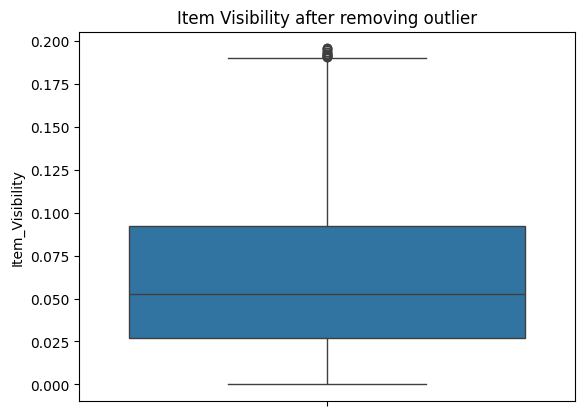

In [17]:
sns.boxplot(train['Item_Visibility'])
plt.title('Item Visibility after removing outlier')

In [18]:
# detect outliers in the Item_Outlet_Sales feature
train_upper, train_lower = detect_outliers(train, "Item_Outlet_Sales")

In [19]:
print("Upper limit for train data",train_upper)
print("Lower limit for train data",train_lower)

Upper limit for train data 6499.2067
Lower limit for train data -2499.7460999999994


Text(0.5, 1.0, 'Item Outlet sale before removing outlier')

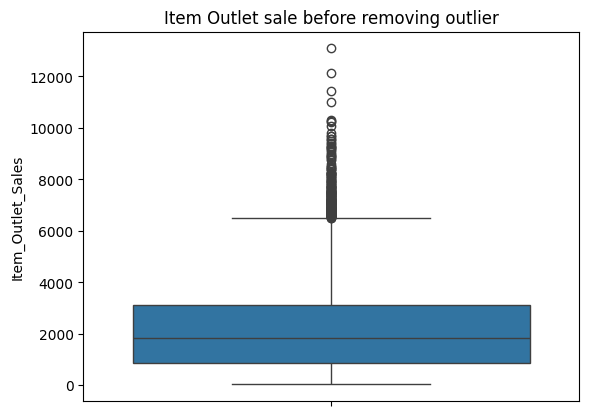

In [20]:
sns.boxplot(train['Item_Outlet_Sales'])
plt.title("Item Outlet sale before removing outlier")

In [21]:
train=train[(train['Item_Outlet_Sales']>train_lower) & (train['Item_Outlet_Sales']<train_upper)]

Text(0.5, 1.0, 'Item outlet sales after removing outlier')

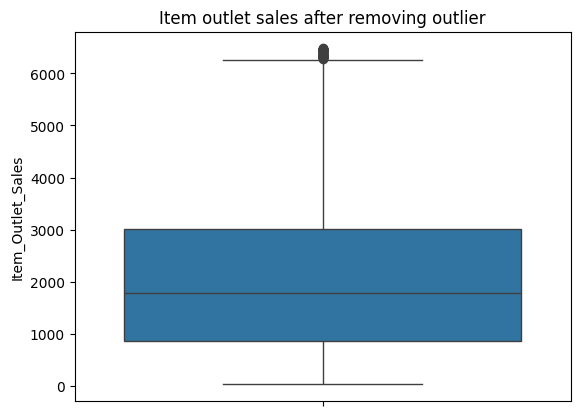

In [22]:
sns.boxplot(train['Item_Outlet_Sales'])
plt.title("Item outlet sales after removing outlier")

# Checking for Duplicate value in data

In [23]:
# checking duplicate vakues in train data
f"We have {train.duplicated().sum()} duplicate value in our train data"

'We have 0 duplicate value in our train data'

In [24]:
# Checking duplicate values in test data
f'We have {test.duplicated().sum()} duplicate values in our test data'

'We have 0 duplicate values in our test data'

In [25]:
# Let's correct the errors in the Item_Fat_Content column
train['Item_Fat_Content']=train['Item_Fat_Content'].map({'Low Fat':'Low Fat',
                                                         'low fat':'Low Fat',
                                                         'LF':'Low Fat',
                                                         'Regular':'Regular',
                                                         'reg':'Regular'})

In [26]:
test['Item_Fat_Content']=test['Item_Fat_Content'].map({'Low Fat':'Low Fat',
                                                         'low fat':'Low Fat',
                                                         'LF':'Low Fat',
                                                         'Regular':'Regular',
                                                         'reg':'Regular'})

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

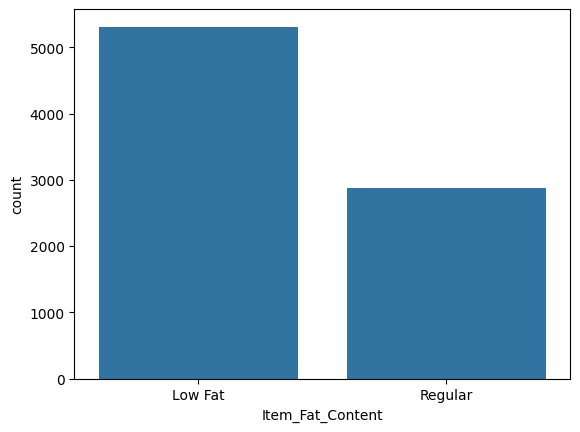

In [27]:
sns.countplot(x=train['Item_Fat_Content'])

In [28]:
# getting the amount of established years in new column and delete old column
train['Outlet_Age']=2024-train['Outlet_Establishment_Year']
test['Outlet_Age']=2024-test['Outlet_Establishment_Year']

In [29]:
del train['Outlet_Establishment_Year']
del test['Outlet_Establishment_Year']

<Axes: xlabel='Outlet_Age', ylabel='count'>

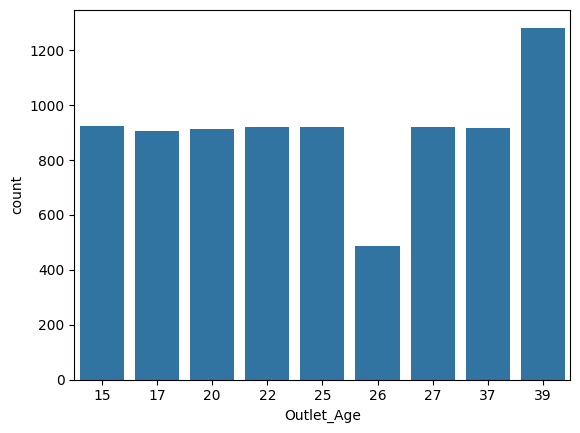

In [30]:
sns.countplot(x=train['Outlet_Age'])

# Encoding Categorical Variables

# 1. Label Encoding

In [31]:
train['Outlet_Size']=train['Outlet_Size'].map({'Small':1,
                                               'Medium':2,
                                               'High':3}).astype(int)

In [32]:
test['Outlet_Size']=test['Outlet_Size'].map({'Small':1,
                                             "Medium":2,
                                             "High":3}).astype(int)

<Axes: xlabel='Outlet_Size', ylabel='count'>

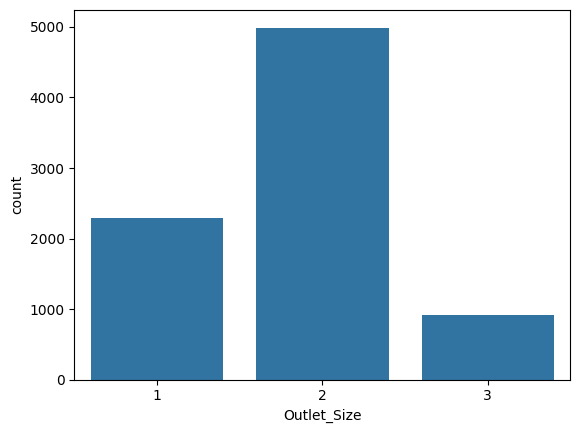

In [33]:
sns.countplot(x=train['Outlet_Size'])

In [34]:
# Outlet_Location_Type feature encoding by getting the last character and converting to int type
train['Outlet_Location_Type']=train['Outlet_Location_Type'].str[-1:].astype(int)

In [35]:
test['Outlet_Location_Type']=test['Outlet_Location_Type'].str[-1:].astype(int)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

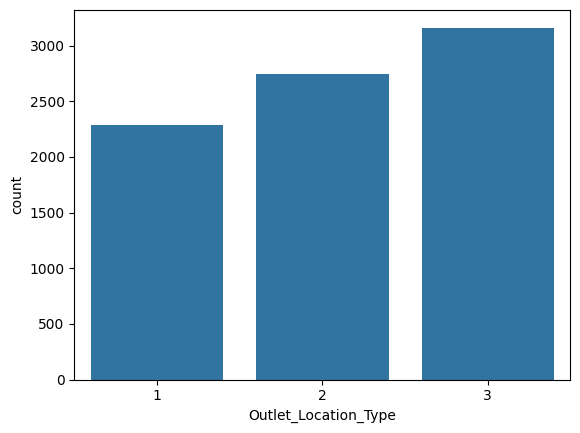

In [36]:
sns.countplot(x=train['Outlet_Location_Type'])

In the Item_Type feature, there are 16 catgories but when we look closely to Item_Identifier_Categories, it has first two characters defining the item type, these are:

1. FD for probably Food;
2. DR for probably Drinks;
3. NC for probably Non-Consumables.
# So we'll drop the Item_Identifier feature and create a new column containing these categories.

In [37]:
train['Item_Identifier_Categories']=train['Item_Identifier'].str[0:2]
test['Item_Identifier_Categories'] = test['Item_Identifier'].str[0:2]

<Axes: xlabel='Item_Identifier_Categories', ylabel='count'>

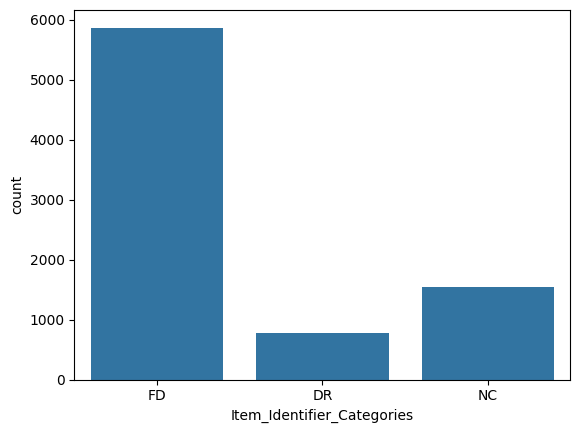

In [38]:
sns.countplot(x=train['Item_Identifier_Categories'])

In [39]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Categories
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2,1,Supermarket Type1,3735.1380,25,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2,3,Supermarket Type2,443.4228,15,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2,1,Supermarket Type1,2097.2700,25,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2,3,Grocery Store,732.3800,26,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,3,3,Supermarket Type1,994.7052,37,NC


In [40]:
#Label Encoder for Ordinate Data
encoder= LabelEncoder()
ordinal_features=['Item_Fat_Content','Outlet_Type','Outlet_Location_Type']

for feature in ordinal_features:
    train[feature]=encoder.fit_transform(train[feature])
    test[feature]= encoder.transform(test[feature])   # we use tranform on test data & fit_transorm on train data
    
train.shape

(8193, 13)

In [41]:
test.shape

(5568, 12)

In [42]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Categories
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,2,0,1,3735.1380,25,FD
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2,2,2,443.4228,15,DR
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,2,0,1,2097.2700,25,FD
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,2,2,0,732.3800,26,FD
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,3,2,1,994.7052,37,NC


# 12) One Hot Encoding

In [43]:
# One hot encoder for "item Type" variable
train = pd.get_dummies(train, columns=['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'], drop_first=True)
test  = pd.get_dummies(test,  columns=['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'], drop_first=True)

In [44]:
train.shape

(8193, 36)

In [45]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,...,Item_Identifier_Categories_NC,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.30,0,0.016047,249.8092,2,0,1,3735.1380,25,...,False,False,False,False,False,False,False,False,False,True
1,DRC01,5.92,1,0.019278,48.2692,2,2,2,443.4228,15,...,False,False,False,True,False,False,False,False,False,False
2,FDN15,17.50,0,0.016760,141.6180,2,0,1,2097.2700,25,...,False,False,False,False,False,False,False,False,False,True
3,FDX07,19.20,1,0.000000,182.0950,2,2,0,732.3800,26,...,False,False,False,False,False,False,False,False,False,False
4,NCD19,8.93,0,0.000000,53.8614,3,2,1,994.7052,37,...,True,True,False,False,False,False,False,False,False,False


# 13) PreProcessing Data

In [46]:
# Droping unrequired columns
train.drop(labels='Item_Identifier',axis=1,inplace=True)
test.drop(labels='Item_Identifier', axis=1, inplace=True)

In [47]:
X=train.drop('Item_Outlet_Sales',axis=1)
Y=train['Item_Outlet_Sales']

In [48]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Type_Breads,Item_Type_Breakfast,...,Item_Identifier_Categories_NC,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,2,0,1,25,False,False,...,False,False,False,False,False,False,False,False,False,True
1,5.92,1,0.019278,48.2692,2,2,2,15,False,False,...,False,False,False,True,False,False,False,False,False,False
2,17.50,0,0.016760,141.6180,2,0,1,25,False,False,...,False,False,False,False,False,False,False,False,False,True
3,19.20,1,0.000000,182.0950,2,2,0,26,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8.93,0,0.000000,53.8614,3,2,1,37,False,False,...,True,True,False,False,False,False,False,False,False,False


In [49]:
Y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [50]:
# Spliting data set into train & test in ratio of 80:20
from sklearn.model_selection import train_test_split
X_Train, X_test, Y_Train, Y_test=train_test_split(X,Y,test_size=0.2)

# Model Trainig

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from xgboost import XGBRegressor
from scipy.stats import randint, uniform
import pickle

# Linear Regression

In [52]:
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_Train, Y_Train)

LinearRegression()

In [53]:
# Predictions for LinearRegression on the test data
Lin_Reg_Pred=lin_reg_model.predict(X_test)

In [54]:
Lin_train_score=lin_reg_model.score(X_Train,Y_Train)
Lin_test_score=lin_reg_model.score(X_test,Y_test)
print("Training Score",Lin_train_score)
print("Test Score",Lin_test_score)

Training Score 0.55507046410797
Test Score 0.5317792877462575


In [55]:
# Evaluation
lin_reg_mse=mean_squared_error(Y_test,Lin_Reg_Pred)
lin_reg_rmse=math.sqrt(lin_reg_mse)
lin_reg_r2=r2_score(Y_test,Lin_Reg_Pred)
print("RMSE score for Linear Regression Model ------>",lin_reg_rmse)
print("R2 score ----->",lin_reg_r2)

RMSE score for Linear Regression Model ------> 1006.9818321525229
R2 score -----> 0.5317792877462575


1. The LinearRegression model above give us a training accuracy and a test accuracy of about 55%. We also get an RMSE of about 1006.82 and a R2 score of 0.53.
2. Let's try to add some polynomial features to see how good the Linear Regression performs. However, something else we would like to do is standardize our data. This scales our data down to a range between 0 and 1. This serves the purpose of letting us work with reasonable numbers when we raise to a power.

In [56]:
steps = [
    ('scaler', StandardScaler()),
    ('poly',   PolynomialFeatures(degree=2)),
    ('model',  LinearRegression())
       ]

lin_reg_pipeline = Pipeline(steps)

lin_reg_pipeline.fit(X_Train, Y_Train)

print(f'The train accuracy of Regression model is {lin_reg_pipeline.score(X_Train,Y_Train)}')
print(f'The test accuracy of Regression model is {lin_reg_pipeline.score(X_test,Y_test)}')

The train accuracy of Regression model is 0.6028333499981028
The test accuracy of Regression model is 0.555104321845884


We got a better Training score of about 0.5998 but the Test score is 0.56 which means that the models start to overfit the data. If we increase the degree of PolynomialFeatures it will get worse.

# Regularized Linear Regression

# 1. Ridge Regression or L2 Regularization

To understand Ridge Regression, we need to remind ourselves of what happens during gradient descent, when our model coefficients are trained. During training, our initial weights are updated according to a gradient update rule using a learning rate and a gradient. Ridge regression adds a penalty to the update, and as a result shrinks the size of our weights. This is implemented in scikit-learn as a class called Ridge.
We will specify our regularization strength by passing in a parameter, alpha. The larger the value of alpha, the less variance your model will exhibit.

In [57]:
step=[
    ('standard', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model',Ridge(alpha=9, fit_intercept=True))
    ]

ridge_pipeline=Pipeline(step)
ridge_pipeline.fit(X_Train,Y_Train)

print('Training Score  : {}'.format(ridge_pipeline.score(X_Train, Y_Train)))
print('Test Score      : {}'.format(ridge_pipeline.score(X_test, Y_test)))

Training Score  : 0.6028495543119141
Test Score      : 0.5552810847826051


In [58]:
# Predictions for Ridge on the test data
ridge_prediction=ridge_pipeline.predict(X_test)

In [59]:
# Evaluation
ridge_mse=mean_squared_error(Y_test,ridge_prediction)
ridge_rmse=math.sqrt(ridge_mse)
ridge_r2score=r2_score(Y_test,ridge_prediction)

print('Ridge RMSE        ----->',ridge_rmse)
print('ridge_r2_score     ---->',ridge_r2score)

Ridge RMSE        -----> 981.3843438285695
ridge_r2_score     ----> 0.5552810847826051


# 2. Lasso Regression or L1 Regularization

By creating a polynomial model, we created additional features. The question we need to ask ourselves is which of our features are relevant to our model, and which are not.

L1 regularization tries to answer this question by driving the values of certain coefficients down to 0. This eliminates the least important features in our model. We will create a pipeline similar to the one above, but using Lasso. You can play around with the value of alpha, which can range from 0.1 to 1.

In [60]:
step= [
    ('standard',StandardScaler()),
    ('poly',PolynomialFeatures(degree=2)),
    ('model',Lasso(alpha=0.2,fit_intercept=True))
]
lasso_pipeline=Pipeline(steps)
lasso_pipeline.fit(X_Train,Y_Train)

print(f'Accuracy for train data for lasso is {lasso_pipeline.score(X_Train,Y_Train)}')
print(f'Accuracy for test data of lasso is ',lasso_pipeline.score(X_test,Y_test))

Accuracy for train data for lasso is 0.6028333499981028
Accuracy for test data of lasso is  0.555104321845884


In [61]:
# Prediction for test data using Lasso
lasso_prediction=lasso_pipeline.predict(X_test)

In [62]:
# Evauation
lasso_mse=mean_squared_error(Y_test,lasso_prediction)
lasso_rmse=math.sqrt(lasso_mse)
lasso_r2_score=r2_score(Y_test,lasso_prediction)

print('RMSE value of lasso is ',lasso_rmse)
print('r2 score for lasso model is ', lasso_r2_score)

RMSE value of lasso is  981.5793604318559
r2 score for lasso model is  0.555104321845884


By seeing above result we can say that Ridge and Lasso gives better results than LinearRegression.

# RandomForest

In [63]:
random_forest_model=RandomForestRegressor()
random_forest_model.fit(X_Train,Y_Train)

RandomForestRegressor()

In [64]:
# Prediction for random forest on test data
Rand_forest_pred=random_forest_model.predict(X_test)

In [65]:
print('Train Data score for Random Forest',random_forest_model.score(X_Train,Y_Train))
print('Test data score for Random FOrest model',random_forest_model.score(X_test,Y_test))

Train Data score for Random Forest 0.9363836529559314
Test data score for Random FOrest model 0.5010656539688538


In [66]:
# Evaluation
RF_MSE=mean_squared_error(Y_test,Rand_forest_pred)
RF_RMSE=math.sqrt(RF_MSE)
RF_R2_Score=r2_score(Y_test,Rand_forest_pred)

print('RMSE value for Random FOrest MOodel is ',RF_RMSE)
print("R2 Score for Random FOrest Model is ",RF_R2_Score)

RMSE value for Random FOrest MOodel is  1039.4845174343777
R2 Score for Random FOrest Model is  0.5010656539688538


As we can see that traing score is high and ttest score is low. i.e. Low bias and high variance.Hence it is case of overfitting model. We can handle this issue with hyperparameter tuning.

In [68]:

# Define the parameter distribution

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Perform random search
Random_search=RandomizedSearchCV(estimator=random_forest_model,param_distributions=param_dist, n_iter=50,cv=50, n_jobs=-1, verbose=2,random_state=42)

# fitting the model
Random_search.fit(X_Train,Y_Train)

# Getting Best Parameter as output

Best_parameter=Random_search.best_params_
print("Best parameter for random search cv is ",Best_parameter)

Fitting 50 folds for each of 27 candidates, totalling 1350 fits
Best parameter for random search cv is  {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 5}


In [69]:
final_random_forest_model=RandomForestRegressor(**Best_parameter)

In [70]:
final_random_forest_model.fit(X_Train,Y_Train)

RandomForestRegressor(max_depth=5, min_samples_split=10)

In [71]:
final_random_predict=final_random_forest_model.predict(X_test)

In [72]:
print('training score of Final Random Forest model is ',final_random_forest_model.score(X_Train,Y_Train))
print('test score of final random forest model is ',final_random_forest_model.score(X_test,Y_test))

training score of Final Random Forest model is  0.5944143690769195
test score of final random forest model is  0.5578636984241734


In [73]:
# Evaluation
final_RF_MSE=mean_squared_error(Y_test,final_random_predict)
final_RF_RMSE=math.sqrt(final_RF_MSE)
final_R2_score=r2_score(Y_test,final_random_predict)

print('RMSE value of final random forest model is ',final_RF_RMSE)
print('R2 Score for final Random Forest model is ',final_R2_score)

RMSE value of final random forest model is  978.5306007892734
R2 Score for final Random Forest model is  0.5578636984241734


In [74]:
cv_scores = cross_val_score(final_random_forest_model, X_Train, Y_Train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation Scores: {-cv_scores}")
print(f"Average CV Score: {-cv_scores.mean()}")

Cross-Validation Scores: [ 922028.76454779  914821.67604709  922519.69343275  960421.50703351
 1027306.7233121 ]
Average CV Score: 949419.6728746488


Still our model not performing up to the par

# XGBoost

In [75]:
xg_boost=XGBRegressor()
xg_boost.fit(X_Train, Y_Train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [76]:
# Predictions for XGBoost on the test data

xg_boost_pred=xg_boost.predict(X_test)

In [77]:
print('training score of XG Boost model is ',xg_boost.score(X_Train,Y_Train))
print("test score for XG bosst model is ",xg_boost.score(X_test,Y_test))

training score of XG Boost model is  0.8523102181586357
test score for XG bosst model is  0.46650250366965984


In [78]:
# Evaluation
xgboost_mse=mean_squared_error(Y_test,xg_boost_pred)
xgboost_rmse=math.sqrt(xgboost_mse)
xgboost_r2score=r2_score(Y_test,xg_boost_pred)

print('XG Boost model have RMSE value as ',xgboost_rmse)
print('XG Boost model have R2 Score as ',xgboost_r2score)

XG Boost model have RMSE value as  1074.8862745452343
XG Boost model have R2 Score as  0.46650250366965984


We can see that training accuracy is good but test accuracy is low. hence this model is also not good fit. We'll try to tune the hyperparameters for XGBoost and see how the model performs.

In [79]:
# Hyper parameter tunning for XG Boost model
# Define the parameter grid
param_grid = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.9),
    'colsample_bytree': uniform(0.3, 0.9),
    'gamma': uniform(0, 5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xg_boost,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter combinations to try
    scoring='neg_mean_squared_error',  # For regression problems
    cv=5,  # Cross-validation splits
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search model
random_search.fit(X_Train, Y_Train)

# Print the best parameters and score
Best_parameter=random_search.best_params_
best_score=random_search.best_score_
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'colsample_bytree': 0.9757839610123475, 'gamma': 3.7727143704234116, 'learning_rate': 0.040937160650779784, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 161, 'reg_alpha': 0.4965611906830777, 'reg_lambda': 0.38961808621920346, 'subsample': 0.7678716570583798}
Best score: -946874.3294688367


c:\Users\syada11\Stores_sales_prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
130 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\syada11\Stores_sales_prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\syada11\Stores_sales_prediction\venv\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\syada11\Stores_sales_prediction\venv\lib\site-packages\xgboost\sklearn.py", line 1108, in fit
    self._Booster =

In [80]:
final_xg_boost=XGBRegressor(**Best_parameter)

In [81]:
final_xg_boost.fit(X_Train,Y_Train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9757839610123475, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=3.7727143704234116,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.040937160650779784,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=161, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [82]:
final_xgb_pred=final_xg_boost.predict(X_test)

In [83]:
print('Training score for final XG Boost model is ',final_xg_boost.score(X_Train,Y_Train))
print('Test score for final XG Boost model is ',final_xg_boost.score(X_test,Y_test))

Training score for final XG Boost model is  0.608513302607482
Test score for final XG Boost model is  0.5632856617601791


In [84]:
# Evalution
final_XGB_MSE=mean_squared_error(Y_test,final_xgb_pred)
final_XGB_RMSE=math.sqrt(final_XGB_MSE)
final_XGB_R2_score=r2_score(Y_test,final_xgb_pred)

print('RMSE value for Hypertuned XG Boost Model is ',final_XGB_RMSE)
print('R2_score for Hypertuned XG Boost model is ',final_R2_score)

RMSE value for Hypertuned XG Boost Model is  972.5121816100832
R2_score for Hypertuned XG Boost model is  0.5578636984241734


1. From all Above model We can see that after Hypertuning XG Boost model is giving Best (Lowest) RMSE value as 972.6172064798538 and R2 value is 0.5572 which is lower than Lasso having R2 as  0.555.
2. Our Priority is to minimizing prediction errors hence we are considering XG boost as our model.
If our priority was related to explain variance and test performance than we might consider Lasso as our model

# Final Predictions On The Test Dataset

In [181]:
# Final predictions on test data using Lasso
final_test_preds = final_xg_boost.predict(test)

# Saving The Final Model

In [183]:
# Saving model to pickle file
with open("BigMart_Sales_Model.pkl", "wb") as file: # file is a variable for storing the newly created file.
    pickle.dump(final_xg_boost, file)              # Dump function is used to write the object into the created file in byte format.